In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load feature variables and their names
X = np.loadtxt('./hitters/hitters.x.csv', delimiter=',', skiprows=1)
with open('./hitters/hitters.x.csv', 'r') as f:
    X_colnames = next(csv.reader(f))

#load salaries
y = np.loadtxt('./hitters/hitters.y.csv', delimiter=',', skiprows=1)

### Problem 4.1 : Scale the feature variables to that they have stddev of 1, and mean 0
It is a common practice in machine learning problems due to:
* Numerical Stability: to remove the bias towards the scaling of the input features, it makes the optimization process more stable and convergence faster

* Equal Importance: To make algorithm to behave equally to all features, otherwise it features with larger scaling might dominate the learning process, causing the ignorance of smaller features.

* Interpretability: If the features are on different scales, it is very difficult to interpret between features.

* For the regularization techniques l1-regularization (lasso), l2-regularization(ridge), having same scales help the regularization to behave uniformly across all features. For example for the ordinary LS solution, having large scales on the features will make the scaling of the weights smaller. However, if we use the regularization techniques, that means small features will have large coefficents, and because of the large coefficients, these features have larger penalty, which destabilizes the learning process.

In [3]:
X -= X.mean(0) # substract the mean along the features, we have 19 features
X /= X.std(0) # divide by the std to get std of 1 along the features
# why we did this for the 0th axis, because we want to go over all rows

### Problem 4.2: Add a bias term, X=[1 X] as a new column
* But do not include bias weight in the penalty of rigde regression
* Please see the handwritten solutions for the exclusion of bias term

In [4]:
X_tilda = np.hstack((np.ones(X.shape[0])[:,None], X))
Iex = np.eye(20)
Iex[0,0] = 0

### Problem 4.3: Compute rigde regression by closed-form solution

In [5]:
lamda_array = np.logspace(-3, 7, 100)
theta_ridge_list = [np.linalg.inv(X_tilda.T @ X_tilda + lamda*Iex) @ (X_tilda.T @ y) for lamda in lamda_array]
norm_thetas = np.sqrt((np.array(theta_ridge_list)[:, 1:]**2).sum(1))

Text(0.5, 1.0, 'Norm of coefficients for different lamdas')

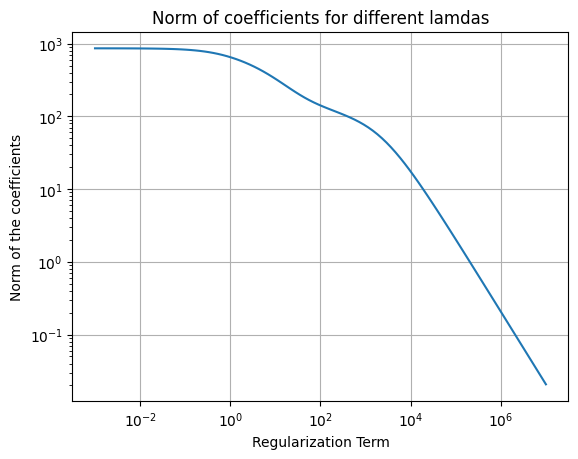

In [6]:
plt.loglog(lamda_array, np.array(norm_thetas))
plt.xlabel("Regularization Term")
plt.ylabel("Norm of the coefficients")
plt.grid()
plt.title("Norm of coefficients for different lamdas")

### Problem 4.4 lamda = 0, LS = ridge; lamda = infinity, ridge = 0

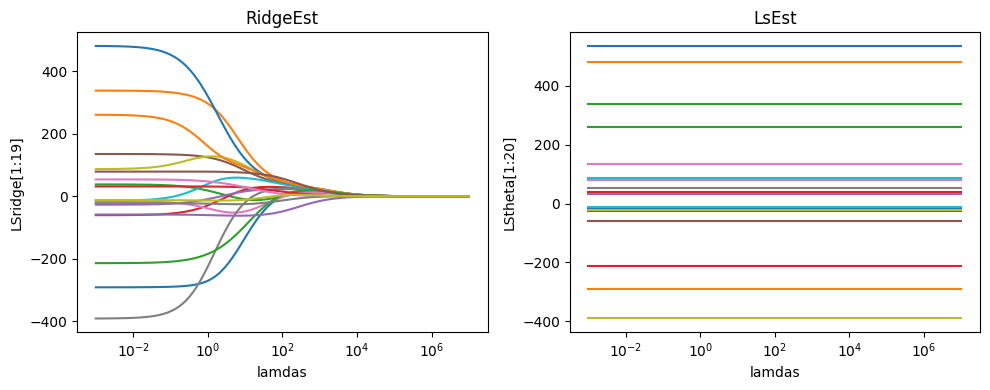

In [25]:
theta_LS = np.linalg.inv(X_tilda.T @ X_tilda) @ X_tilda.T @ y
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
for j, theta in enumerate(theta_LS):
    if j == 0: continue
    plt.semilogx(lamda_array, np.array(theta_ridge_list)[:, j])
    
plt.xlabel("lamdas")
plt.ylabel("LSridge[1:19]")
plt.title("RidgeEst")

plt.subplot(1,2,2)
for j, theta in enumerate(theta_LS):
    plt.semilogx(lamda_array, np.ones_like(lamda_array) * theta)
    
plt.xlabel("lamdas")
plt.ylabel("LStheta[1:20]")
plt.title("LsEst")

plt.tight_layout()
plt.show()

### Problem 4.5: 5-fold cross validation to determine lamda

In [15]:
def cross_valFor(matrix, output, lamda, fold):
    perm_indices = np.random.permutation(matrix.shape[0])
    matrix = matrix[perm_indices]
    output = output[perm_indices]
    random_indices = np.random.choice(matrix.shape[0], matrix.shape[0] % fold, replace=False)
    output_splitted = np.split(np.delete(output, random_indices), fold)
    matrix_splitted = np.split(np.delete(matrix, random_indices, axis=0), fold)
    errors = []
    for test_index in range(fold):
        test_matrix = matrix_splitted[test_index]
        test_output = output_splitted[test_index]
        train_matrix = np.vstack(matrix_splitted[:test_index]+matrix_splitted[test_index+1:])
        train_output = np.hstack(output_splitted[:test_index]+output_splitted[test_index+1:])
        coeff = np.linalg.inv(train_matrix.T @ train_matrix + lamda*Iex) @ (train_matrix.T @ train_output)
        errors.append(((test_output - test_matrix @ coeff)**2).mean())
    return errors

In [16]:
err = np.sqrt(np.array([cross_valFor(X_tilda, y, lamda, 5) for lamda in lamda_array]).mean(1))

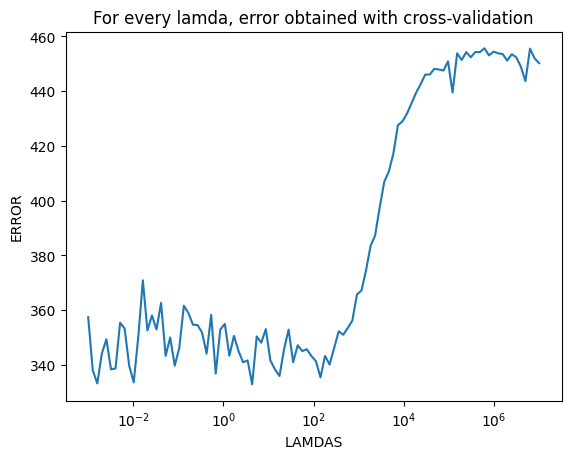

Best value of lambda: 4.32876


In [26]:
plt.semilogx(lamda_array, err)

plt.xlabel("LAMDAS")
plt.ylabel("ERROR")
plt.title("For every lamda, error obtained with cross-validation")
plt.show()

best_lamda_i = np.argmin(err)
best_lamda = lamda_array[best_lamda_i]
print('Best value of lambda: %g' % best_lamda)

### Problem 4.6 Report of fine-tuned coefficients

In [18]:
fine_tuned_theta = np.linalg.inv(X_tilda.T @ X_tilda + best_lamda*Iex) @ (X_tilda.T @ y)

In [24]:
for i in range(len(fine_tuned_theta)-1):
    if i == 0: 
        print('Bias:' ,fine_tuned_theta[i]) 
        continue
    print('%s: %g' % (X_colnames[i], fine_tuned_theta[i]))

Bias: 535.9258441064638
Hits: -200.654
HmRun: 215.612
Runs: -1.13128
RBI: 4.98787
Walks: 7.4262
Years: 102.345
CAtBat: -52.2524
CHits: -75.4697
CHmRun: 116.958
CRuns: 59.0227
CRBI: 180.736
CWalks: 109.831
LeagueN: -136.358
DivisionW: 29.9891
PutOuts: -61.9238
Assists: 77.245
Errors: 37.2466
NewLeagueN: -25.2977
